In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_context('paper')

# Ploting ditributions

## Gaussian family

A common notation used in statistics to indicate that a variable is distributed as a normal distribution with parameters and is:

$$ x \sim \mathcal{N}(\mu, \sigma)  $$

A variable, X, follows a Gaussian distribution if its
values are dictated by the following expression:

$$ p(x|\mu, \sigma) = \frac1{\sigma \sqrt{2\pi}}\operatorname e^{-\frac12\left(\frac{x-\mu}{\sigma}\right)^2} $$

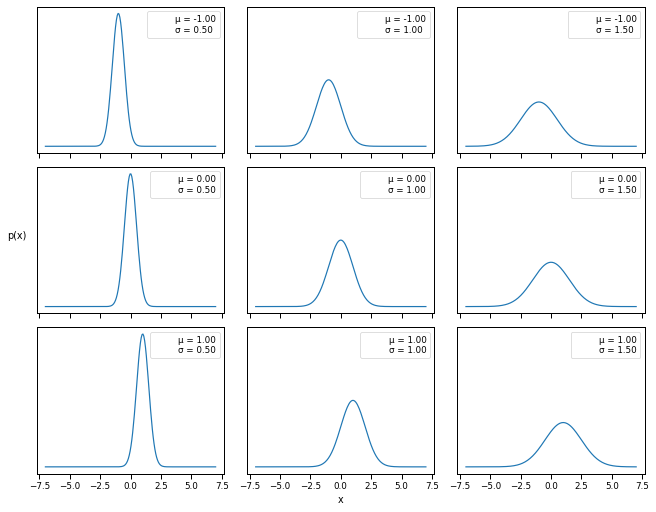

In [2]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 200)
_, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True,
                     sharey=True, figsize=(9, 7), 
                     constrained_layout=True)
for i in range(3):
  for j in range(3):
    mu = mu_params[i]
    sd = sd_params[j]
    y = stats.norm(mu, sd).pdf(x)
    ax[i,j].plot(x, y)
    ax[i,j].plot([], label="μ = {:3.2f}\nσ = {:3.2f}".format(mu,
    sd), alpha=0)
    ax[i,j].legend(loc=1)
    ax[2,1].set_xlabel('x')
    ax[1,0].set_ylabel('p(x)', rotation=0, labelpad=20)
    ax[1,0].set_yticks([])

* continuous / discrete variables
* y ticks are omitted
* values plotted on the y axis are not probabilities, but **probability
densities**
* Many models assume that successive values of random variables are all sampled from the same distribution and those values are independent of each other (i.e. independently and identically distributed)

# Bayes' theorem

If we replace $\theta$ with hypothesis and $y$ with data, Bayes' theorem tells us how to compute the
probability of a hypothesis, $\theta$, given the data, $y$, and that's the way you will find Bayes'
theorem explained in a lot of places.

$$ p(\theta|y) = \frac{p(y|\theta)p(\theta)}{p(y)} $$

* $ p(\theta)$ : Prior
* $ p(y|\theta) $: Likelihood
* $ p(\theta|y)$: Posterior distribution 
* $ p(y)$: Marginal likelihood, or evidence

# Coin-flip - beta-binomial model

Bias: $\theta$

Number of tosses: $N$

number of heads: $y$

The likelihood of the random variable coin toss is generated using the binomial distribution:

## Likelihood

### Binomial distribution

$$ p(y |\theta, N) = \frac{N!}{y!(N-y)!}\theta^{y}(1-\theta)^{N-y} $$

This is a discrete distribution returning the probability of getting successes out of experiments given a fixed value of $\theta$.

We can some distributions using Scipy and the [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) method.

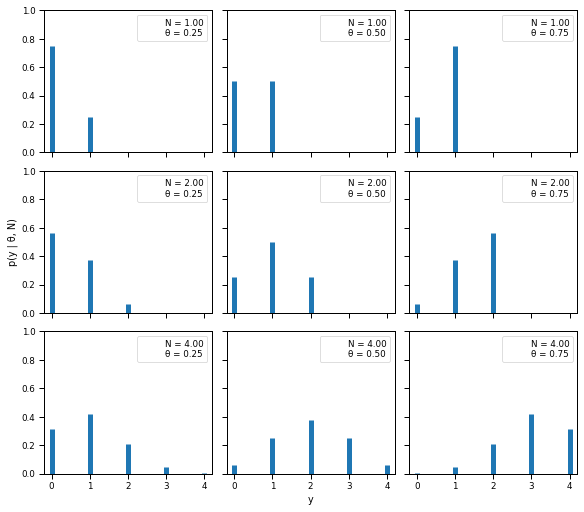

In [3]:
n_params = [1, 2, 4] # Number of trials
p_params = [0.25, 0.5, 0.75] # Probability of success
x = np.arange(0, max(n_params)+1)
f,ax = plt.subplots(len(n_params), len(p_params), sharex=True,
sharey=True,
figsize=(8, 7), constrained_layout=True)
for i in range(len(n_params)):
  for j in range(len(p_params)):
    n = n_params[i]
    p = p_params[j]
    y = stats.binom(n=n, p=p).pmf(x)
    ax[i,j].vlines(x, 0, y, colors='C0', lw=5)
    ax[i,j].set_ylim(0, 1)
    ax[i,j].plot(0, 0, label="N = {:3.2f}\nθ = {:3.2f}".format(n,p), alpha=0)
    ax[i,j].legend()
    ax[2,1].set_xlabel('y')
    ax[1,0].set_ylabel('p(y | θ, N)')
    ax[0,0].set_xticks(x)

## Prior

### Beta distribution

$$ p(\theta) = \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\theta^{\alpha-1}(1-\theta)^{\beta-1} $$

The first term is a normalizing constant
that ensures the distribution integrates to 1.

The beta distribution is the conjugate prior of the binomial distribution.

Text(0.07, 0.5, 'p(θ)')

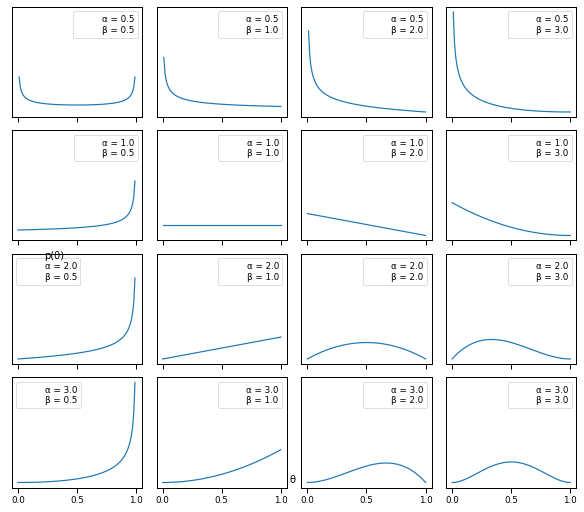

In [4]:
params = [0.5, 1, 2, 3]
x = np.linspace(0, 1, 100)
f, ax = plt.subplots(len(params), len(params), sharex=True, sharey=True, figsize=(8, 7), constrained_layout=True)
for i in range(4):
  for j in range(4):
    a = params[i]
    b = params[j]
    y = stats.beta(a, b).pdf(x)
    ax[i,j].plot(x, y)
    ax[i,j].plot(0, 0, label="α = {:2.1f}\nβ = {:2.1f}".format(a,
    b), alpha=0)
    ax[i,j].legend()
ax[1,0].set_yticks([])
ax[1,0].set_xticks([0, 0.5, 1])
f.text(0.5, 0.05, 'θ', ha='center')
f.text(0.07, 0.5, 'p(θ)', va='center', rotation=0)

## Computing the posterior

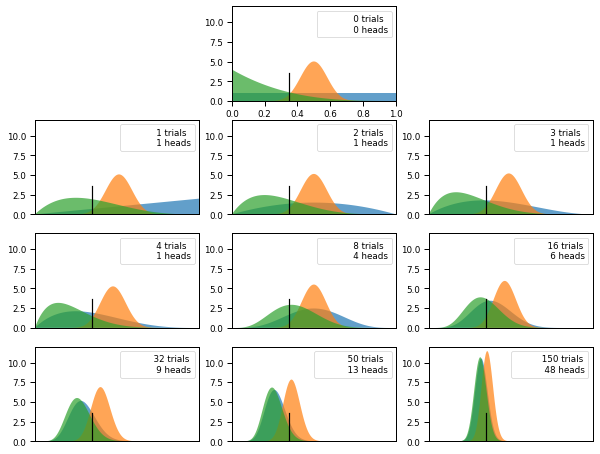

In [5]:
plt.figure(figsize=(10, 8))
n_trials = [0, 1, 2, 3, 4, 8, 16, 32, 50, 150]
data = [0, 1, 1, 1, 1, 4, 6, 9, 13, 48]
theta_real = 0.35
beta_params = [(1, 1), (20, 20), (1, 4)]
dist = stats.beta
x = np.linspace(0, 1, 200)
for idx, N in enumerate(n_trials):
  if idx == 0:
    plt.subplot(4, 3, 2)
    plt.xlabel('θ')
  else:
    plt.subplot(4, 3, idx+3)
    plt.xticks([])
  y = data[idx]
  for (a_prior, b_prior) in beta_params:
    p_theta_given_y = dist.pdf(x, a_prior + y, b_prior + N - y)
    plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
  plt.axvline(theta_real, ymax=0.3, color='k')
  plt.plot(0, 0, label=f'{N:4d} trials\n{y:4d} heads', alpha=0)
  plt.xlim(0, 1)
  plt.ylim(0, 12)
  plt.legend()

## Creating a GIF showing posterior updating as data comes in

In [6]:
import imageio
import os

theta = 0.2
y = 0
ntrials = 100
filenames = []
nTrials = 500
alpha, beta = 1, 1
x = np.linspace(0, 1, 200)

for N in range(ntrials):

  y += stats.bernoulli.rvs(theta, size=1)[0]
  p_theta_given_y = stats.beta.pdf(x, alpha + y, beta + N - y)

  plt.fill_between(x, 0, p_theta_given_y, alpha=0.7)
  plt.axvline(theta, ymax=0.3, color='k')
    
  # create file name and append it to a list
  filename = f'{N}.png'
  filenames.append(filename)
    
  # save frame
  plt.savefig(filename)
  plt.close()# build gif

with imageio.get_writer('bayesianToss.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)